# Zeitreihenanalyse eines Satellitenobjektes

Der ideale Verlauf der Wolkenoberkantenabkühlrate folgt einer Sigmoidfunktion. Wir sehen uns mal für ein Beispiel an, ob wir eine solche Funktion anpassen können.

In [11]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import xarray as xr
import glob

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("/vols/talos/home/stephan/utils/tracking")
import object_tracking as ot

In [5]:
talos_home = "/vols/talos/home/stephan"
proj_path = "{}/proj/2019-01_trackingstudie".format(talos_home)
data_path = "{}/data/radar_track/trackdata".format(talos_home)

In [9]:
data = xr.open_dataset("{}/haci_trackdata_20130722_22.nc".format(data_path))

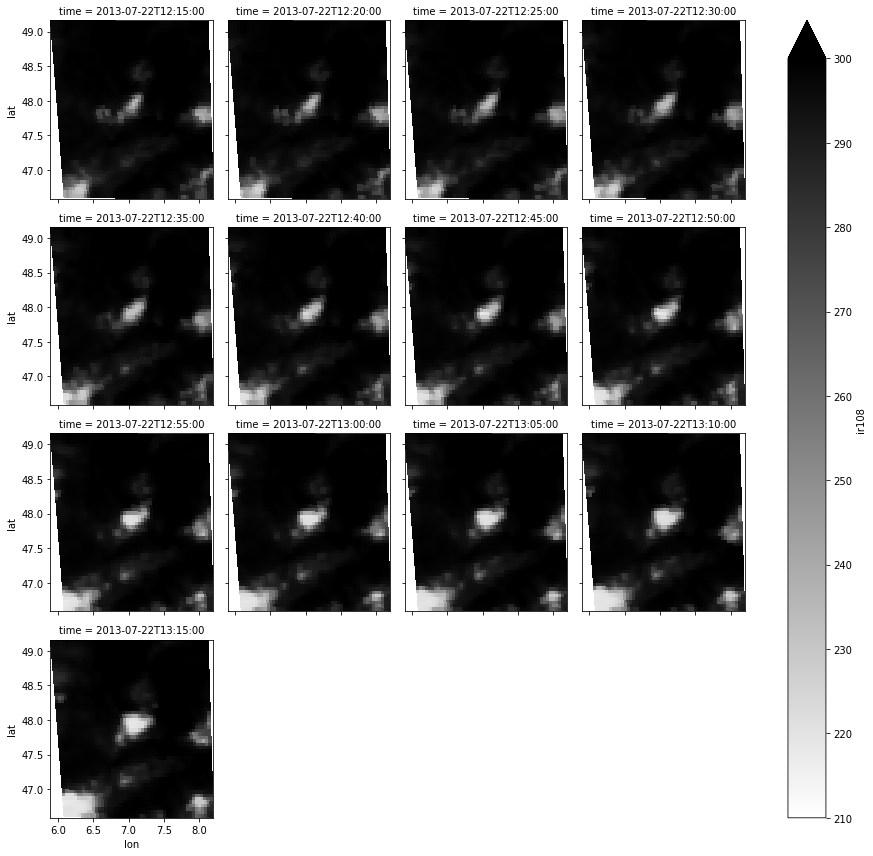

In [10]:
data.ir108.plot(x='lon',y='lat',col='time',col_wrap=4,vmin=210,vmax=300,cmap='gray_r')

In [44]:
objects = ot.segment_morphological_reconstruction(data.ir108.data,'min',-20)

In [57]:
objects = []
for d in data.ir108.data:
    holes = ot.find_holes(o)
    
    obj = np.zeros_like(o)
    obj[holes < -30] = 1
    objects.append(obj)

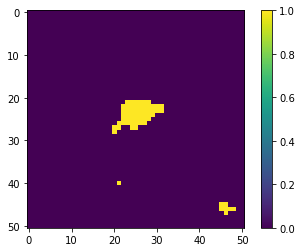

In [58]:
plt.imshow(objects[6])
plt.colorbar()

In [92]:
obj = [ot.segment_morphological_reconstruction(o,'-',-10) for o in data.ir108.data]

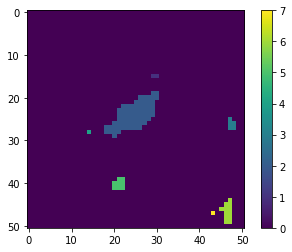

In [99]:
plt.imshow(obj[6])
plt.colorbar()

In [96]:
graph, tracks = ot.generate_graph_from_components(obj,data.time.data,min_connections=1,track_point='centroid')

In [97]:
tracks

In [102]:
def get_wanted_object_id(segmented_fields):
    t_centre = len(segmented_fields)//2
    x_shape = segmented_fields[t_centre].shape[0]
    y_shape = segmented_fields[t_centre].shape[1]
     
    wanted_id = []
     
    for o in np.unique(segmented_fields[t_centre]):
       idx = np.where(segmented_fields[t_centre]==o)
        
       if x_shape//2 in idx[0] and y_shape//2 in idx[1]:
           wanted_id = o
       else:
           continue
        
    return wanted_id

def get_wanted_graph(object_graphs, target_object_id):
    wanted_object_graph = []

    for obj in object_graphs:
        if target_object_id in obj.nodes():
            wanted_object_graph = obj
        else:
            continue
        
    return wanted_object_graph

In [103]:
wanted_id = get_wanted_object_id(obj)

In [112]:
wanted_graph = get_wanted_graph(tracks,"{}_{:04d}".format(data.time.data[6],wanted_id))

In [110]:
tracks[0].nodes()

NodeView(('2013-07-22T12:20:00.000000000_0002', '2013-07-22T13:05:00.000000000_0005', '2013-07-22T13:05:00.000000000_0004', '2013-07-22T12:35:00.000000000_0005', '2013-07-22T12:35:00.000000000_0004', '2013-07-22T13:00:00.000000000_0004', '2013-07-22T13:00:00.000000000_0005', '2013-07-22T13:15:00.000000000_0004', '2013-07-22T12:55:00.000000000_0006', '2013-07-22T12:55:00.000000000_0005', '2013-07-22T13:10:00.000000000_0005', '2013-07-22T12:25:00.000000000_0004', '2013-07-22T12:50:00.000000000_0006', '2013-07-22T12:50:00.000000000_0007', '2013-07-22T12:40:00.000000000_0005', '2013-07-22T12:30:00.000000000_0004', '2013-07-22T12:45:00.000000000_0006'))

In [115]:
ot.sort_graph_by_timesteps(wanted_graph)

{0: ['2013-07-22T12:15:00.000000000_0002'],
 1: ['2013-07-22T12:20:00.000000000_0001'],
 2: ['2013-07-22T12:25:00.000000000_0002'],
 3: ['2013-07-22T12:30:00.000000000_0001'],
 4: ['2013-07-22T12:35:00.000000000_0001'],
 5: ['2013-07-22T12:40:00.000000000_0001'],
 6: ['2013-07-22T12:45:00.000000000_0002'],
 7: ['2013-07-22T12:50:00.000000000_0002'],
 8: ['2013-07-22T12:55:00.000000000_0002'],
 9: ['2013-07-22T13:00:00.000000000_0001'],
 10: ['2013-07-22T13:05:00.000000000_0001'],
 11: ['2013-07-22T13:10:00.000000000_0002'],
 12: ['2013-07-22T13:15:00.000000000_0001']}

In [132]:
obj_data = {t:[] for t in np.arange(0,13)}

for node in wanted_graph.nodes():
    node_data =  wanted_graph.nodes()[node]
    print node_data
    t = node_data['itime']
    l = node_data['label']
    data_cutout = obj[t]
    
    obj_data[t] = data.ir108.data[t][np.where(data_cutout == l)]

{'label': 1, 'itime': 5, 'col': 24.5, 'row': 24.0}
{'label': 2, 'itime': 0, 'col': 22.0, 'row': 25.0}
{'label': 1, 'itime': 1, 'col': 22.5, 'row': 25.0}
{'label': 1, 'itime': 10, 'col': 25.0, 'row': 24.0}
{'label': 1, 'itime': 12, 'col': 25.0, 'row': 24.0}
{'label': 1, 'itime': 9, 'col': 24.5, 'row': 24.0}
{'label': 2, 'itime': 2, 'col': 23.0, 'row': 25.0}
{'label': 2, 'itime': 11, 'col': 25.0, 'row': 24.0}
{'label': 2, 'itime': 8, 'col': 24.5, 'row': 24.0}
{'label': 1, 'itime': 3, 'col': 23.5, 'row': 25.0}
{'label': 2, 'itime': 6, 'col': 25.0, 'row': 24.0}
{'label': 2, 'itime': 7, 'col': 25.0, 'row': 24.0}
{'label': 1, 'itime': 4, 'col': 24.0, 'row': 24.0}


In [134]:
obj_data

{0: array([281.82717896, 284.53399658, 273.32177734, 255.72842407,
        253.35090637, 278.45333862, 272.37121582, 245.05352783,
        235.6519165 , 252.56707764, 280.13241577, 286.23721313,
        273.16601562, 251.80528259, 235.37031555, 244.81124878,
        271.28103638, 286.41867065, 272.53115845, 255.66122437,
        242.66900635, 241.81376648, 257.46847534, 279.25222778,
        278.74691772, 274.83111572, 279.51617432, 272.3409729 ,
        280.59469604, 286.94992065, 281.4765625 , 272.58242798,
        259.46182251, 258.24502563, 258.00186157, 273.81796265,
        276.11483765, 274.73318481, 285.72265625, 270.81390381,
        280.64035034, 270.64428711, 266.41690063, 271.97817993,
        272.26138306, 272.97952271, 273.72817993, 281.69085693,
        278.63278198, 276.6300354 , 286.60247803, 286.85195923,
        287.17675781, 283.80221558, 264.81408691, 265.97494507,
        281.57998657, 282.37948608, 285.62496948, 286.92782593,
        286.71920776, 286.82910156, 2

In [197]:
obj_min = [np.min(obj_data[o]) for o in obj_data]

In [198]:
obj_min = np.array(obj_min)

In [199]:
obj_min = np.max(obj_min) - obj_min

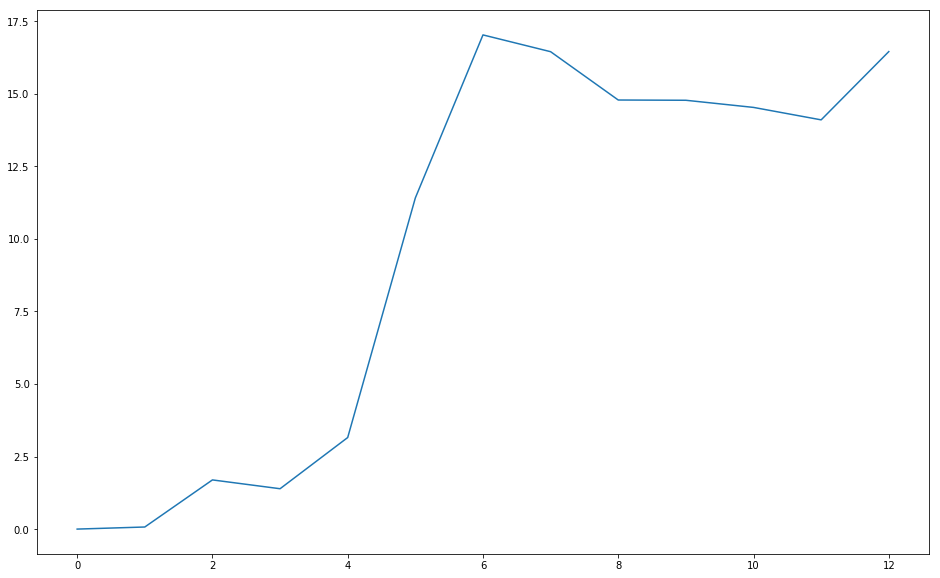

In [200]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.plot(obj_min)

Das sieht einigermaßen sigmoidal aus.

In [178]:
def logistic(x,a,b,c):
    return a / (1+b*np.exp(-c*x))

In [216]:
def logistic2(x,r):
    b3 = np.max(obj_min)
    y0 = obj_min[5] 
    b2 = b3 / y0 - 1
 
    return b3 / (1+b2 * np.exp(-r*x))

In [215]:
b3 = np.max(obj_min)
y0 = obj_min[5] 
b2 = (b3 / y0) - 1

In [214]:
obj_min

array([ 0.        ,  0.07182312,  1.69454956,  1.39089966,  3.15542603,
       11.41189575, 17.02987671, 16.45141602, 14.78639221, 14.77752686,
       14.53147888, 14.10243225, 16.4546814 ])

In [179]:
def mitscherlich(x,a,b,c):
    return a + b*np.exp(-c*x)

In [170]:
tt = np.arange(-30,35,5)

In [219]:
popt, pcov = curve_fit(logistic, tt,obj_min)

/vols/talos/local/anaconda2-5.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [220]:
popt2, pcov2 = curve_fit(mitscherlich, tt,obj_min)

In [221]:
popt

array([ 1.49305014e+01, -3.96039580e+06,  3.51465759e+00])

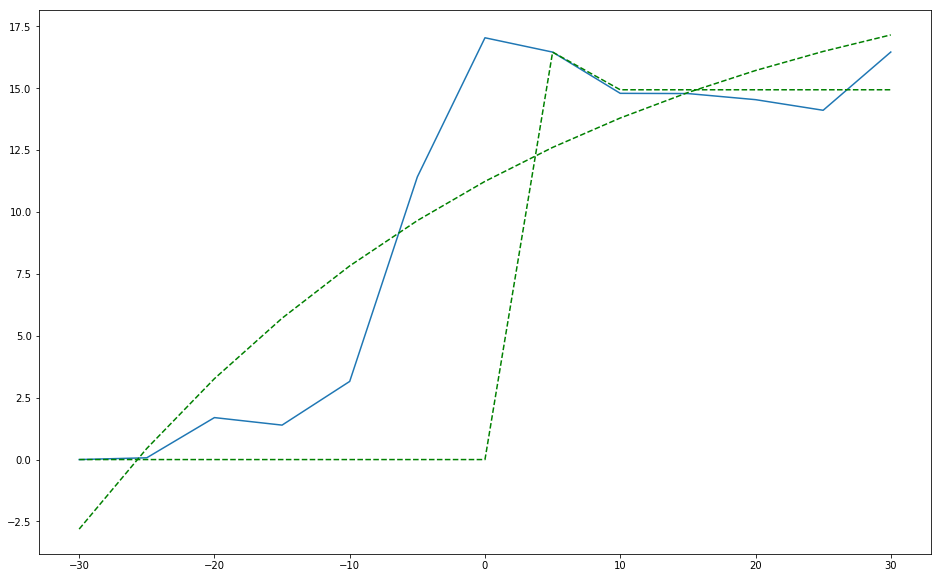

In [222]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
ax.plot(tt,obj_min)
ax.plot(tt, logistic(tt, *popt), 'g--')#,
#label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
ax.plot(tt, mitscherlich(tt, *popt2), 'g--',
label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

In [223]:
a = np.arange(1,10)
b = np.arange(1,10)
c = np.arange(1,10)

fm = {}

for aa in a:
    for bb in b:
        for cc in c:
            fm["{}_{}_{}".format(aa,bb,cc)] = mitscherlich(tt,aa,bb,cc)

In [224]:
fm

{'1_1_1': array([1.06864746e+13, 7.20048993e+10, 4.85165196e+08, 3.26901837e+06,
        2.20274658e+04, 1.49413159e+02, 2.00000000e+00, 1.00673795e+00,
        1.00004540e+00, 1.00000031e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]),
 '1_1_2': array([1.14200739e+26, 5.18470553e+21, 2.35385267e+17, 1.06864746e+13,
        4.85165196e+08, 2.20274658e+04, 2.00000000e+00, 1.00004540e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]),
 '1_1_3': array([1.22040329e+39, 3.73324200e+32, 1.14200739e+26, 3.49342711e+19,
        1.06864746e+13, 3.26901837e+06, 2.00000000e+00, 1.00000031e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]),
 '1_1_4': array([1.30418088e+52, 2.68811714e+43, 5.54062238e+34, 1.14200739e+26,
        2.35385267e+17, 4.85165196e+08, 2.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,10))

for f in fm:
    ax.plot(tt,)

In [163]:
x = np.arange(-30,35,5)

y1 = logistic(x,220,10,10)

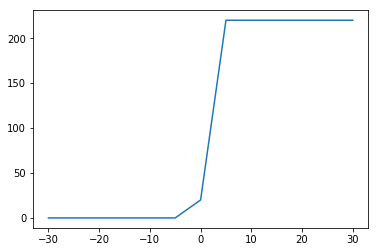

In [164]:
plt.plot(x,y1)